In [106]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import statsmodels.api as sm
from sklearn import metrics


In [224]:
test_df = pd.read_csv(r'input\test.csv')
train_df = pd.read_csv(r'input\train.csv')
submission_df = pd.read_csv(r'input\gender_submission.csv')

In [225]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [226]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [227]:
train_df.shape
test_df.shape

(418, 11)

In [228]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [229]:
def clean_train_df(df):
    #Let's fill the Age values with the mean of all ages
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Embarked'] = df['Embarked'].map({'C':1,'S':2,'Q':3})
    df['Sex'] = df['Sex'].map({'male':1,'female':2})
    df.drop(['Name','Ticket','PassengerId','Cabin'],axis=1,inplace=True)
    #there are 2 entries of Embarked, lets use use them as most frequent one
    df.fillna(df['Embarked'].value_counts().idxmax(),axis=0,inplace=True)

    return df

def clean_test_df(df):
    #Looks like cabin could be an useful feature. So replace all NaN in Cabin with None
    df['Cabin'].fillna("No_Cabin",inplace=True)
    #Let's fill the Age values with the mean of all ages
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    return df


In [230]:
train_df = clean_train_df(train_df)
train_df.isna().sum()


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [231]:
#Lets now look and analyse data
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

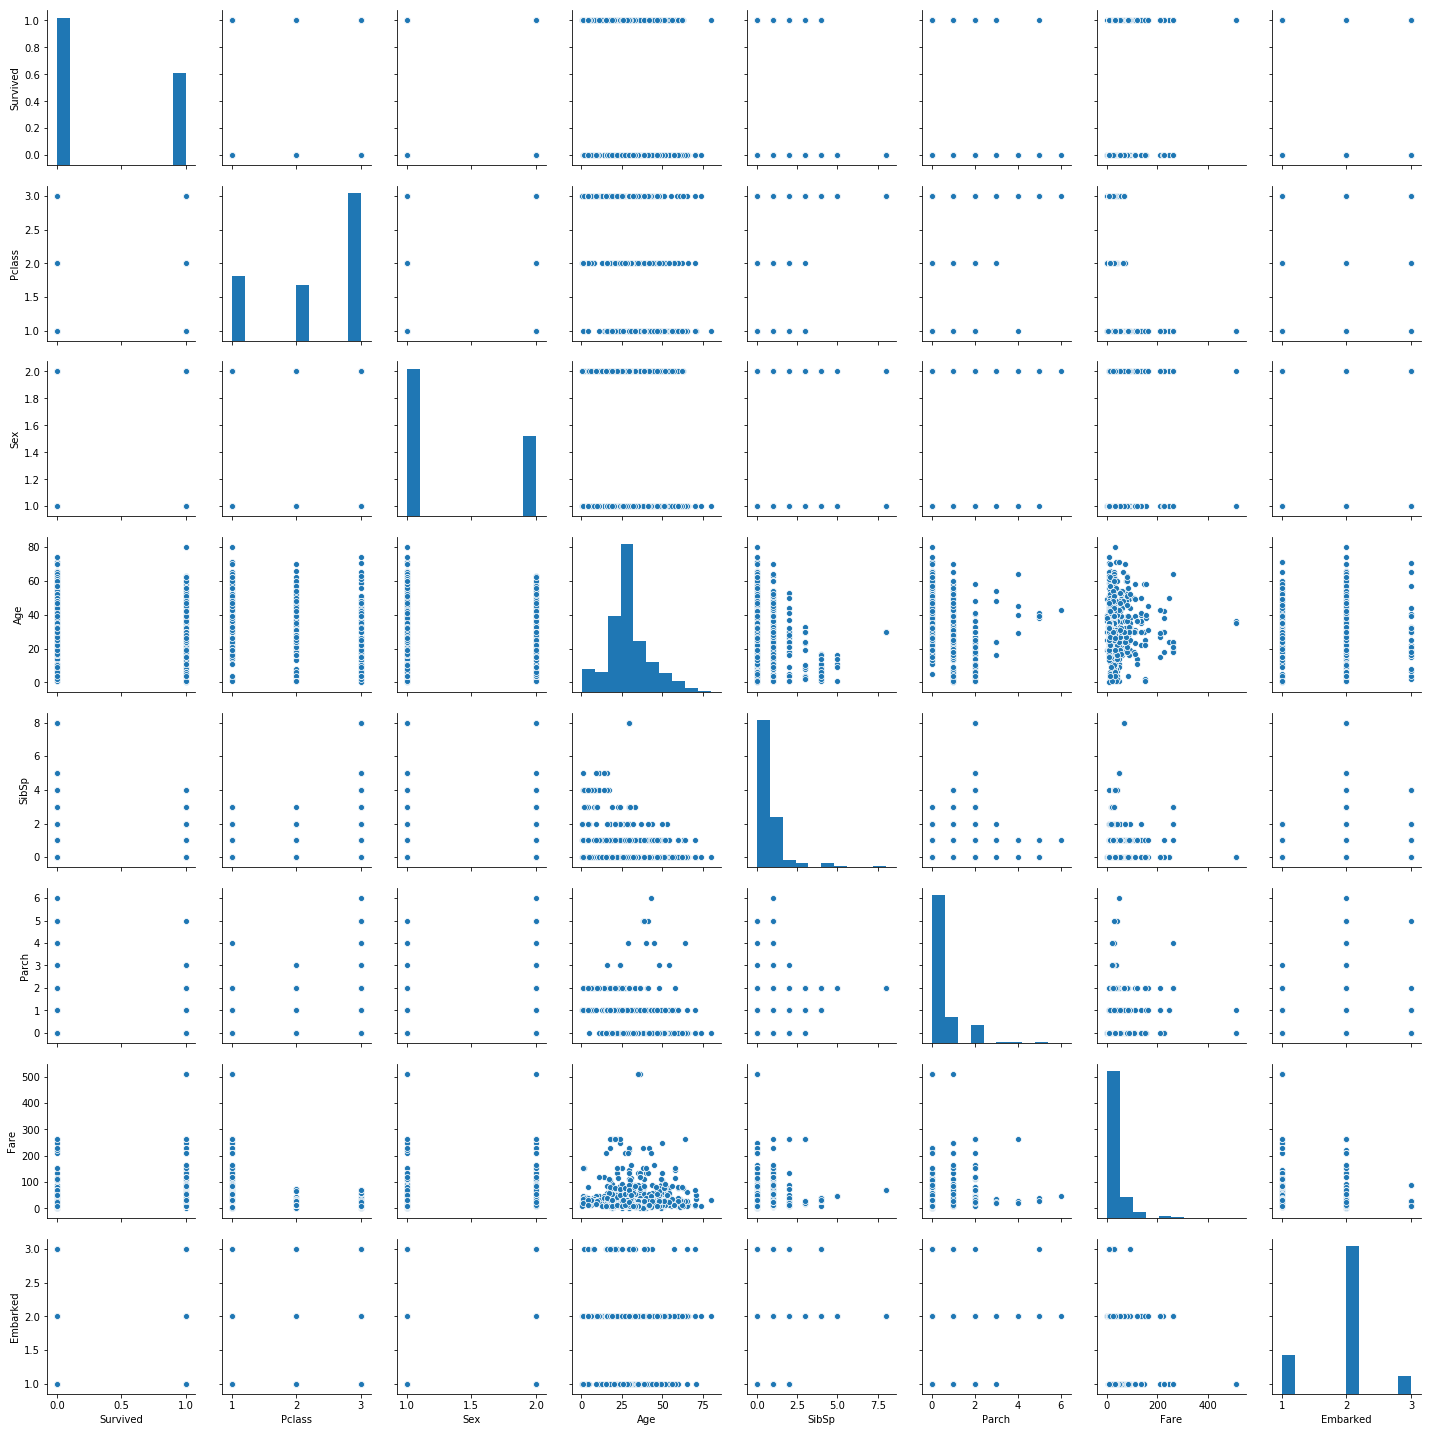

In [232]:
#lets create a graph to see every feature relation with other features
sns.pairplot(train_df)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


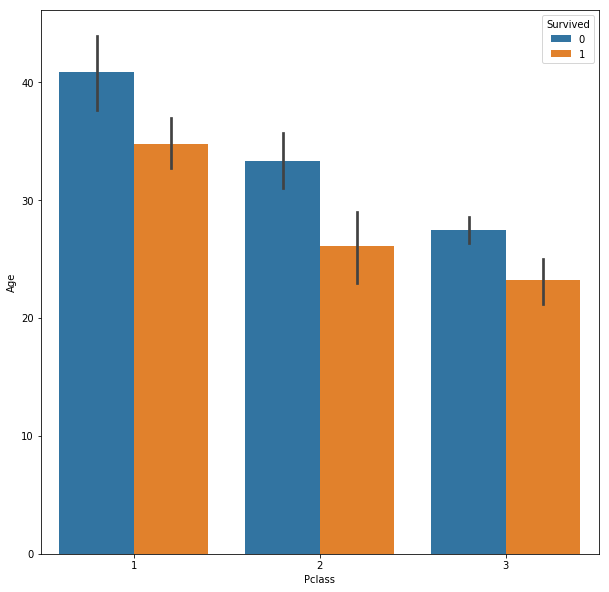

In [233]:
#lets create borplots to understand date better
plt.figure(figsize=(10,10))
sns.barplot(x='Pclass',y='Age',hue='Survived',data=train_df)

In [234]:
#Seems like Age is a feature that we can choose. Plus in every Pclass the survived/Not-survived is similar

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


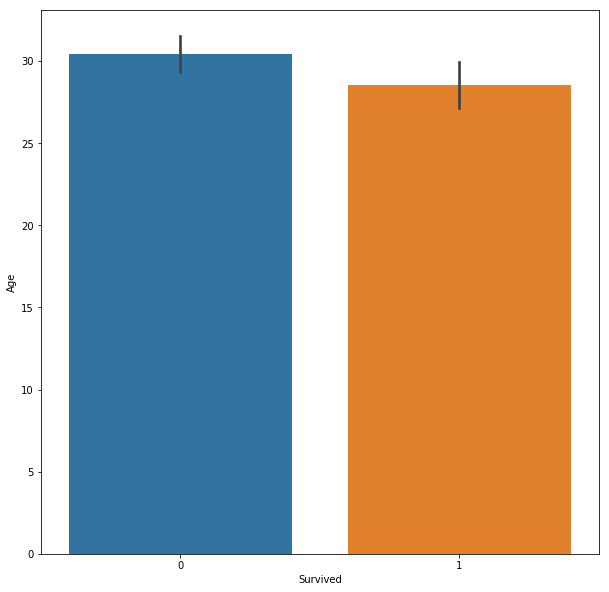

In [235]:
plt.figure(figsize=(10,10))
sns.barplot(x='Survived',y='Age',data=train_df)

In [236]:
#the above graph says that age does play a role

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


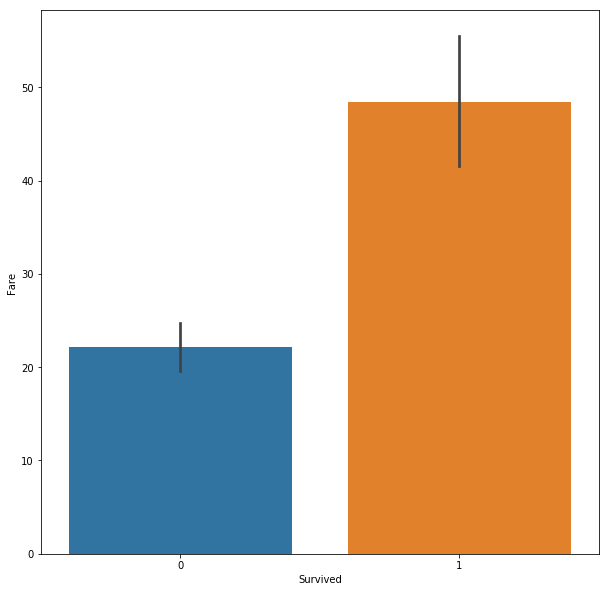

In [237]:
plt.figure(figsize=(10,10))
sns.barplot(x='Survived',y='Fare',data=train_df)

In [238]:
#So Fare plays a much bigger role that age

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


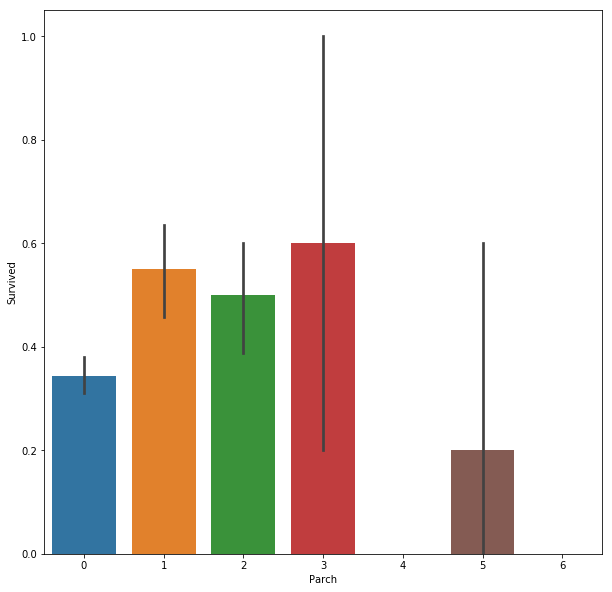

In [239]:
plt.figure(figsize=(10,10))
sns.barplot(x='Parch',y='Survived',data=train_df)

In [240]:
#Parch is also important

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


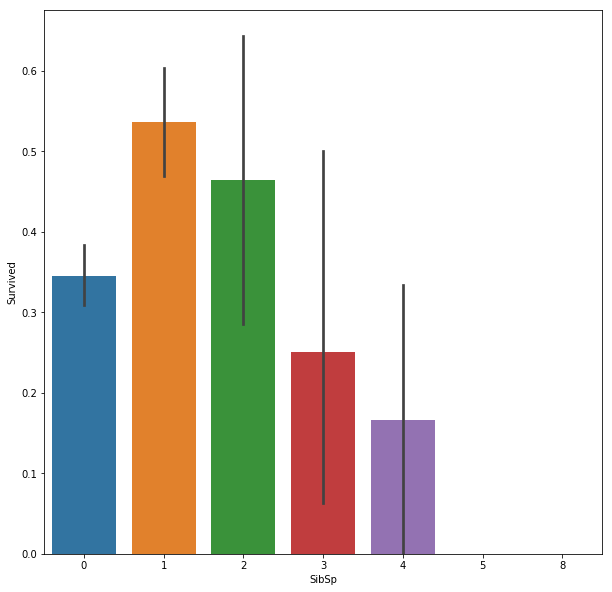

In [241]:
plt.figure(figsize=(10,10))
sns.barplot(x='SibSp',y='Survived',data=train_df)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


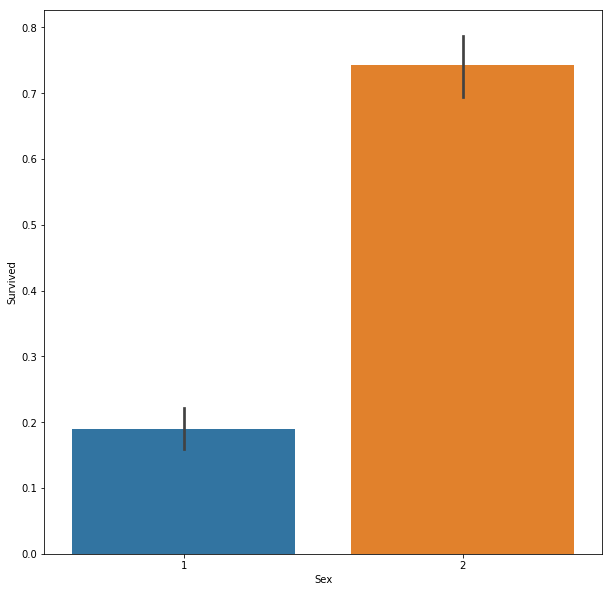

In [242]:
plt.figure(figsize=(10,10))
sns.barplot(x='Sex',y='Survived',data=train_df)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


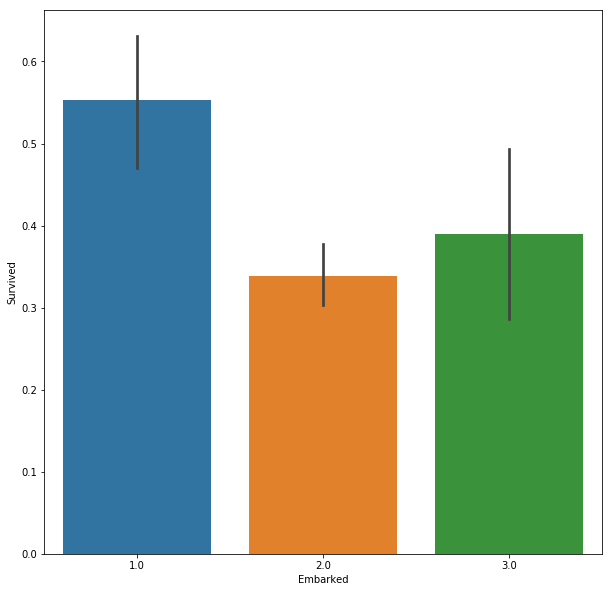

In [243]:
plt.figure(figsize=(10,10))
sns.barplot(x='Embarked',y='Survived',data=train_df)

In [244]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2.0
1,1,1,2,38.0,1,0,71.2833,1.0
2,1,3,2,26.0,0,0,7.9250,2.0
3,1,1,2,35.0,1,0,53.1000,2.0
4,0,3,1,35.0,0,0,8.0500,2.0


In [245]:
#Looks like following features are important
Y = train_df['Survived']
train_df.drop('Survived',axis=1,inplace=True)
train_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2.0
1,1,2,38.0,1,0,71.2833,1.0
2,3,2,26.0,0,0,7.9250,2.0
3,1,2,35.0,1,0,53.1000,2.0
4,3,1,35.0,0,0,8.0500,2.0


In [246]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_df,Y,test_size = .30)

In [247]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
X_train.columns

Index(['const', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [248]:
X_train.head()

,const,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
189,1.0,3,1,36.0,0,0,7.8958,2.0
595,1.0,3,1,36.0,1,1,24.1500,2.0
479,1.0,3,2,2.0,0,1,12.2875,2.0
37,1.0,3,1,21.0,0,0,8.0500,2.0
688,1.0,3,1,18.0,0,0,7.7958,2.0


In [249]:
logist = sm.Logit(Y_train,X_train)
model = logist.fit()
model.summary()


Optimization terminated successfully.
         Current function value: 0.461270
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  623
Model:                          Logit   Df Residuals:                      615
Method:                           MLE   Df Model:                            7
Date:                Sat, 09 Mar 2019   Pseudo R-squ.:                  0.3131
Time:                        16:01:44   Log-Likelihood:                -287.37
converged:                       True   LL-Null:                       -418.38
                                        LLR p-value:                 7.663e-53
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9251      0.681     -1.359      0.174      -2.260       0.409
Pclass        -0.9572      0.166     -5.756      0.000      -1.283      -0.631
Sex            2.7064      0.236     11.478      0.000       2.244       3.168
Age           -0.0307      0.009     -3.518      0.000      -0.048      -0.014
SibSp         -0.3478      0.131     -2.660      0.008      -0.604      -0.091
Parch         -0.1840      0.129     -1.427      0.154      -0.437       0.069
Fare           0.0035      0.003      1.095      0.274      -0.003       0.010
Embarked      -0.0321      0.218     -0.147      0.883      -0.459       0.394
==============================================================================
"""

In [250]:
Y_train_prob = model.predict(X_train)


In [251]:
def get_score(actual,predicted):
    cc = metrics.confusion_matrix(actual,predicted)
    cc
def print_confusion_matrix(actual,predicted):
    cc = metrics.confusion_matrix(actual,predicted)
    sns.heatmap(cc,annot=True,fmt='.2f',xticklabels =["True Value","Predicted Value"],yticklabels =["True Value,""Predicted Value"])
    return cc


In [252]:
Y_test_prob = model.predict(X_test)

In [253]:
def convert_prob_to_val(data,threshold = 0.5):
    data = data.map( lambda x: 1 if x > threshold else 0)
    return data

In [254]:
Y_train_pred = convert_prob_to_val(Y_train_prob)
Y_test_pred = convert_prob_to_val(Y_test_prob)


In [255]:
train_compare_db = pd.DataFrame({'train actual' : Y_train,
                          'train predicted' : Y_train_pred})
test_compare_db = pd.DataFrame({'test actual' : Y_test,
                          'test predicted' : Y_test_pred})

In [256]:
train_compare_db.head()

,train actual,train predicted
189,0,0
595,0,0
479,1,1
37,0,0
688,0,0


In [257]:
test_compare_db.head()

,test actual,test predicted
862,1,1
43,1,1
544,0,0
116,0,0
200,0,0


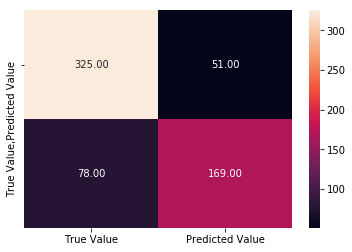

In [258]:
train_cc = print_confusion_matrix(Y_train,Y_train_pred)

In [259]:
print(metrics.classification_report(Y_train,Y_train_pred))

             precision    recall  f1-score   support

          0       0.81      0.86      0.83       376
          1       0.77      0.68      0.72       247

avg / total       0.79      0.79      0.79       623



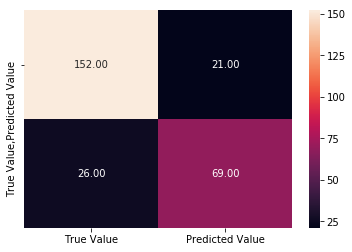

In [260]:
test_cc = print_confusion_matrix(Y_test,Y_test_pred)

In [261]:
print(metrics.classification_report(Y_test,Y_test_pred))

             precision    recall  f1-score   support

          0       0.85      0.88      0.87       173
          1       0.77      0.73      0.75        95

avg / total       0.82      0.82      0.82       268



In [262]:
#Now let's mmove to the test data
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [263]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [264]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [265]:
passender_id = test_df['PassengerId']
passender_id

0       892
1       893
2       894
3       895
4       896
5       897
6       898
7       899
8       900
9       901
10      902
11      903
12      904
13      905
14      906
15      907
16      908
17      909
18      910
19      911
20      912
21      913
22      914
23      915
24      916
25      917
26      918
27      919
28      920
29      921
       ... 
388    1280
389    1281
390    1282
391    1283
392    1284
393    1285
394    1286
395    1287
396    1288
397    1289
398    1290
399    1291
400    1292
401    1293
402    1294
403    1295
404    1296
405    1297
406    1298
407    1299
408    1300
409    1301
410    1302
411    1303
412    1304
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [266]:
test_df = clean_train_df(test_df)

In [267]:
test_df.isna().sum()
test_df.shape

(418, 7)

In [268]:
X_test = test_df[train_df.columns]

X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,3
1,3,2,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,3
3,3,1,27.0,0,0,8.6625,2
4,3,2,22.0,1,1,12.2875,2


In [269]:
X_test = sm.add_constant(X_test)

In [270]:
Y_test_prob = model.predict(X_test)
Y_test_pred = convert_prob_to_val(Y_test_prob)
Y_test_prob.shape

(418,)

In [273]:
passender_id.iloc[0:]

0       892
1       893
2       894
3       895
4       896
5       897
6       898
7       899
8       900
9       901
10      902
11      903
12      904
13      905
14      906
15      907
16      908
17      909
18      910
19      911
20      912
21      913
22      914
23      915
24      916
25      917
26      918
27      919
28      920
29      921
       ... 
388    1280
389    1281
390    1282
391    1283
392    1284
393    1285
394    1286
395    1287
396    1288
397    1289
398    1290
399    1291
400    1292
401    1293
402    1294
403    1295
404    1296
405    1297
406    1298
407    1299
408    1300
409    1301
410    1302
411    1303
412    1304
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [275]:
submission_df = pd.DataFrame({'PassengerId':passender_id.iloc[0:],
                             'Survived':Y_test_pred})
#gender_submission

In [276]:
submission_df.to_csv(r"gender_submission.csv")

In [277]:
#Now let's use sklearn
from sklearn.linear_model import LogisticRegression

In [279]:
print(train_df.head())
print(Y.head())

   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    1  22.0      1      0   7.2500       2.0
1       1    2  38.0      1      0  71.2833       1.0
2       3    2  26.0      0      0   7.9250       2.0
3       1    2  35.0      1      0  53.1000       2.0
4       3    1  35.0      0      0   8.0500       2.0
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [281]:
model = LogisticRegression(solver='lbfgs',fit_intercept=True).fit(train_df,Y)

In [282]:
Y_pred = model.predict(train_df)

In [284]:
model.score(train_df,Y)

0.7991021324354658

In [285]:
Y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,

In [287]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,3
1,3,2,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,3
3,3,1,27.0,0,0,8.6625,2
4,3,2,22.0,1,1,12.2875,2


In [288]:
Y_test_pred = model.predict(test_df)

In [290]:
Y_test_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [291]:


submission_df = pd.DataFrame({'PassengerId':passender_id.iloc[0:],
                             'Survived':Y_test_pred})
submission_df.to_csv(r"gender_submission.csv")